In [1]:
import pandas as pd
import numpy as np
import time

dataset_process = pd.read_csv("Base de dados_2_KNN.csv", delimiter=';')

X = dataset_process.loc[: , dataset_process.columns != 'Risk'].values

#XPCA = X.loc[: , dataset_process.columns != 'model'].values
y = dataset_process["Risk"].values

len(dataset_process.columns)

24

In [2]:
display(dataset_process)

,machineID,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,...,voltsd_5d,rotatesd_5d,pressuresd_5d,vibrationsd_5d,model,age,failure,failed,RUL_I,Risk
0,1,167,171.64,449.72,102.23,41.19,13.48,36.65,10.39,5.79,...,1.86,8.31,1.27,3.64,model3,18,none,0,74,low
1,1,168,166.01,437.82,101.38,39.62,15.91,47.27,9.80,4.71,...,3.20,11.81,0.54,3.86,model3,18,none,0,73,low
2,1,169,165.02,455.03,98.69,42.45,14.88,39.88,8.41,5.27,...,3.83,8.93,1.33,3.52,model3,18,none,0,72,low
3,1,170,167.47,430.98,101.78,39.30,15.25,55.78,9.42,4.15,...,3.91,12.24,1.38,1.43,model3,18,none,0,71,low
4,1,171,168.92,440.11,98.12,38.21,13.50,58.61,8.67,3.77,...,2.60,9.61,1.89,1.67,model3,18,none,0,70,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,100,245,172.08,434.49,100.52,37.93,14.07,42.00,9.27,4.27,...,2.26,14.81,1.43,1.10,model4,5,none,0,4,high
7185,100,246,174.04,455.28,100.68,40.72,15.31,48.36,8.23,4.75,...,2.66,12.50,0.91,1.03,model4,5,none,0,3,high
7186,100,247,183.57,461.62,99.72,41.28,19.68,61.83,7.93,5.28,...,6.26,13.29,0.97,1.32,model4,5,none,0,2,high
7187,100,248,194.75,457.27,99.58,40.43,11.45,36.93,7.62,4.92,...,11.00,10.71,0.90,1.29,model4,5,none,0,1,high


In [3]:
dataset_process.drop("model",axis=1,inplace=True)
dataset_process.drop("machineID",axis=1,inplace=True)
dataset_process.drop("time_in_cycles",axis=1,inplace=True)
dataset_process.drop("failure",axis=1,inplace=True)
dataset_process.drop("failed",axis=1,inplace=True)
dataset_process.drop("RUL_I",axis=1,inplace=True)
dataset_process.head
X = dataset_process.loc[: , dataset_process.columns != 'Risk'].values

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
len(X_train)

5751

In [7]:
len(X_test)

1438

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [30]:
knn.score(X_test, y_test)

0.4756606397774687

In [31]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[117,  40, 216],
       [ 58,  78, 205],
       [144,  91, 489]], dtype=int64)

Text(60.0, 0.5, 'Truth')

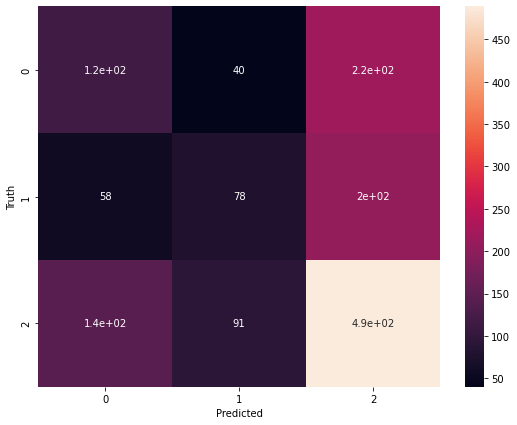

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(9,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.37      0.31      0.34       373
intermediate       0.37      0.23      0.28       341
         low       0.54      0.68      0.60       724

    accuracy                           0.48      1438
   macro avg       0.43      0.41      0.41      1438
weighted avg       0.45      0.48      0.46      1438



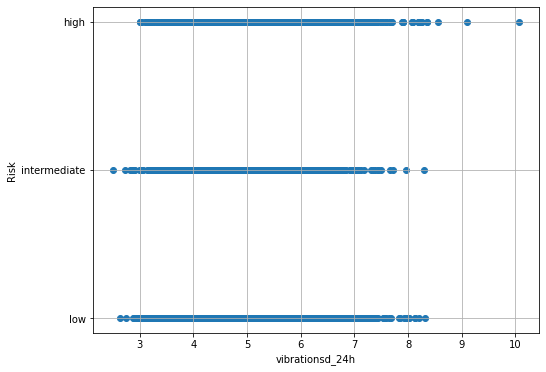

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(dataset_process['vibrationsd_24h'],dataset_process['Risk'])
#plt.scatter(df0['principal component 1'], df0['Label'],color="green",marker='+')
#plt.scatter(df1['principal component 1'], df1['Label'],color="blue",marker='.')
plt.ylabel('Risk')
plt.xlabel('vibrationsd_24h')
plt.grid()

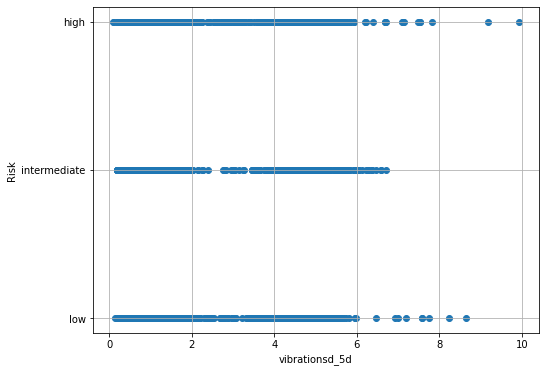

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(dataset_process['vibrationsd_5d'],dataset_process['Risk'])
#plt.scatter(df0['principal component 1'], df0['Label'],color="green",marker='+')
#plt.scatter(df1['principal component 1'], df1['Label'],color="blue",marker='.')
plt.ylabel('Risk')
plt.xlabel('vibrationsd_5d')
plt.grid()

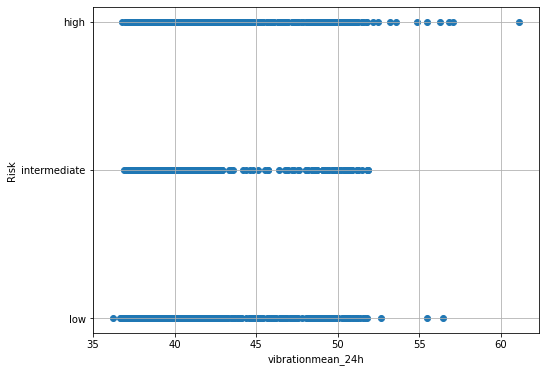

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(dataset_process['vibrationmean_24h'],dataset_process['Risk'])
#plt.scatter(df0['principal component 1'], df0['Label'],color="green",marker='+')
#plt.scatter(df1['principal component 1'], df1['Label'],color="blue",marker='.')
plt.ylabel('Risk')
plt.xlabel('vibrationmean_24h')
plt.grid()

In [ ]:
#PCA_banco_2_normalizado.csv